# About initial conditions

When creating spatio-temporal trajectories of the semi-linear PDEs available in
`Exponax`, we need to decide on two things:

1. The concrete dynamics (this include the PDE, the boundary conditions, the
   constitutive and numerical arguments)
2. The initial condition

The second point affects how the state evolves in time. Some dynamics are highly
sensititive to it, some mostly ignore it. There are many options to define
initial conditions. This notebook introduces you to the ones available in
`Exponax`.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import exponax as ex

Let's again start with the advection equation in 1d

In [3]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 20
DT = 0.01

In [4]:
adv_stepper_1d = ex.stepper.Advection(1, DOMAIN_EXTENT, NUM_POINTS, DT)

2024-03-21 17:17:14.932545: W external/xla/xla/service/gpu/nvptx_compiler.cc:679] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.52). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Let us define two initial condtions for it

$$ u_0(x) = \sin(\frac{2\pi}{L} x) $$

and

$$ u_0(x) = 2 \cos(\frac{2\pi}{L} x) $$

where $L$ is the length of the domain.

In [5]:
grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0_first = jnp.sin(2 * jnp.pi / DOMAIN_EXTENT * grid[0:1])
u_0_second = 2 * jnp.cos(2 * jnp.pi / DOMAIN_EXTENT * grid[0:1])

and produce trajectories for both of them.

In [6]:
trj_first = ex.rollout(adv_stepper_1d, 100, include_init=True)(u_0_first)
trj_second = ex.rollout(adv_stepper_1d, 100, include_init=True)(u_0_second)

visualizing them in a spatio-temporal

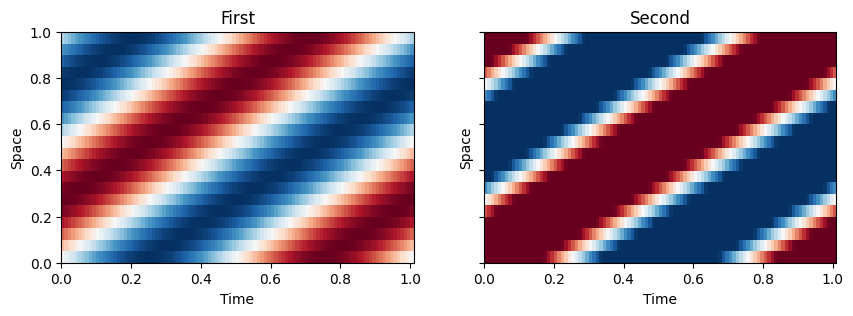

In [7]:
ex.plot_multiple_spatio_temporal(
    jnp.stack([trj_first, trj_second])[:, :, 0, :],
    grid=(1, 2),
    figsize=(10, 3),
    domain_extent=DOMAIN_EXTENT,
    dt=DT,
    include_init=True,
    titles=["First", "Second"],
);

p = ex.plot

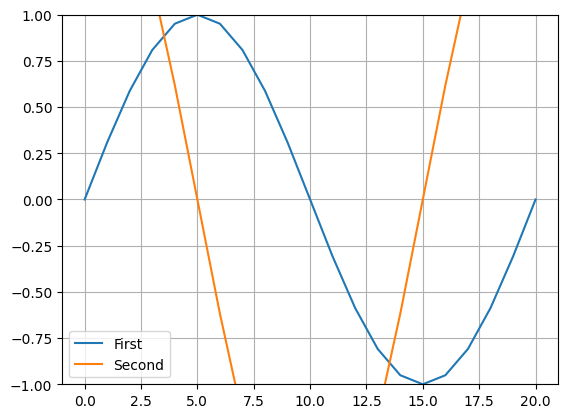

In [8]:
p = ex.plot_state_1d(
    jnp.concatenate((u_0_first, u_0_second)), labels=["First", "Second"]
)

In [12]:
HTML(
    ex.make_animation_1d(
        jnp.concatenate([trj_first, trj_second], axis=1),
        domain_extent=DOMAIN_EXTENT,
        dt=DT,
        include_init=True,
    ).to_html5_video()
)